# Iris Dataset Classification using Gradient Boosting & Single-Layer Percepton

We use Gradient Boosting Classifier using XGBoost and a Single-Layer Perceptron to train the Iris dataset.

In [355]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
%matplotlib inline

In [356]:
path = 'iris.data'

In [357]:
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv(path, delimiter=' ', index_col=False, header=None, 
                 names=cols)

We convert the values to 16-bit floating values to reduce memory usage, and accuracy.

In [358]:
f64_cols = df.select_dtypes(['float64']).columns
df[f64_cols] = df[f64_cols].astype('float16')

Normalize the dataset to improve training performance and accuracy.

In [359]:
sc = StandardScaler()
sc.fit(df[cols[:-1]])
df[cols[:-1]] = sc.transform(df[cols[:-1]])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.898900,1.031980,-1.341072,-1.312955,Iris-setosa
1,-1.145070,-0.125009,-1.341072,-1.312955,Iris-setosa
2,-1.386506,0.335979,-1.398269,-1.312955,Iris-setosa
3,-1.504857,0.105485,-1.284430,-1.312955,Iris-setosa
4,-1.021985,1.262474,-1.341072,-1.312955,Iris-setosa


Plotting all features among themselves clearly suggests that some features discriminate the data very well. A Decision Tree algorithm is the most suitable one for such data.

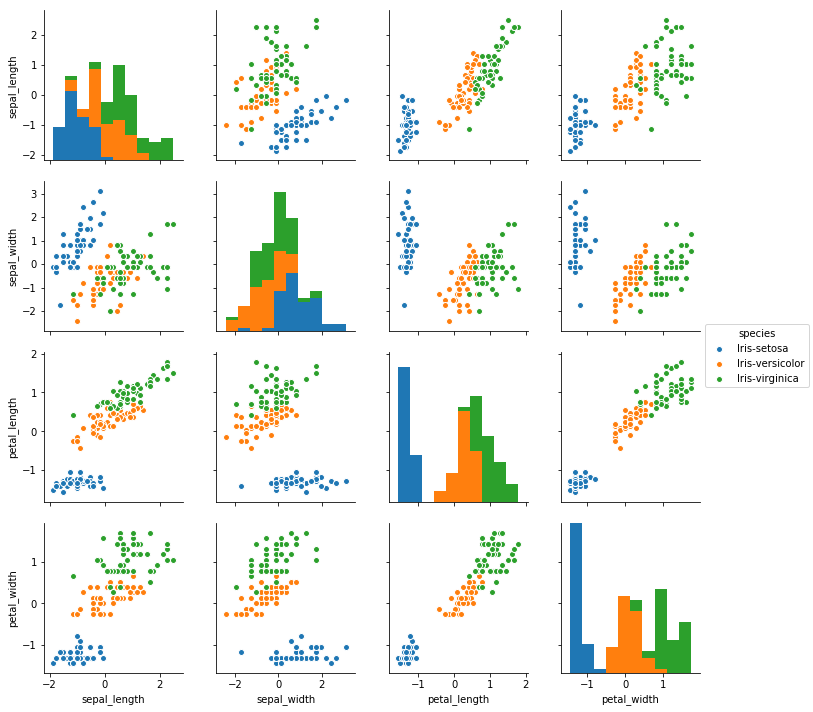

In [360]:
sns.pairplot(df, hue='species', x_vars=cols[:-1], y_vars=cols[:-1])

Convert the labels into numerical categories.

In [361]:
df['species'], labels = pd.factorize(df['species'])

In [362]:
X = df[cols[:-1]].as_matrix()
y = df['species'].as_matrix()
X.shape, y.shape

((150, 4), (150,))

Split the dataset into Training and Test dataset.

In [363]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, 
                                                    shuffle=True)
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((120, 4), (120,)), ((30, 4), (30,)))

We classify our data using the XGBoost classifier. We use Grid Search followed by StratifiedKFold for cross-validation. 
We use the best model using the best parameters found by Grid Search.

In [364]:
params = {'max_depth': [4, 6, 8], 
          'n_estimators': [10, 25, 50]}
clf = XGBClassifier()
cross_validation = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(clf, scoring='accuracy', 
                           param_grid=params, 
                           cv=cross_validation)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [4, 6, 8], 'n_estimators': [10, 25, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [365]:
best_params = grid_search.best_params_
best_model = XGBClassifier(**best_params)
best_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=10, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [366]:
best_model.score(X_test, y_test)

1.0

We use a Single-Layer Perceptron with Softmax activation and backpropagation using RMSProp to train the classifier.

In [367]:
model = Sequential()
model.add(Dense(3, activation='softmax', input_shape=(4, )))
model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop', metrics=['accuracy'])
_y_train = np_utils.to_categorical(y_train, 3)
_y_test = np_utils.to_categorical(y_test, 3)
model.fit(X_train, _y_train, batch_size=10, epochs=200, verbose=0)

In [368]:
loss, score = model.evaluate(X_test, _y_test)
loss, score

30/30 [==============================] - 0s


(0.17524991929531097, 0.96666663885116577)